<h1><center>  <div style="background-color:#E6E6FA;border-radius:10px; padding: 10px;">Predicción de la capacidad de pago de clientes bancarios utilizando técnicas de machine learning</div></center></h1>

![image](https://www.eluniverso.com/resizer/ajyz88RcUW3E-9T2wrFAmotbUIc=/1200x671/smart/filters:quality(70)/cloudfront-us-east-1.images.arcpublishing.com/eluniverso/HQ6LDMKKUFGMFBP3FKAPLL6EE4.jpg)

## Problema a resolver

El problema que se busca resolver en este escenario es la evaluación de la solvencia de los clientes de un banco para tomar decisiones informadas al conceder créditos. El objetivo es utilizar algoritmos de machine learning y modelos predictivos de clasificación para predecir si los clientes pagarán o no su crédito.

Para resolver este problema, se necesita una base de datos que contenga información relevante sobre los clientes, como historial crediticio, ingresos, edad, tiempo trabajado, entre otros posibles factores. A partir de esta información, se utilizarán algoritmos de machine learning para entrenar modelos predictivos.

Estos modelos serán capaces de aprender patrones y relaciones en los datos históricos, lo que les permitirá hacer predicciones sobre la solvencia de los clientes en el futuro. 

La predicción de solvencia de los clientes proporcionará una herramienta valiosa para el banco, ya que podrán tomar decisiones más informadas sobre la concesión de créditos. Por ejemplo, podrían optar por rechazar solicitudes de clientes con alta probabilidad de impago o ajustar los términos y condiciones del crédito según el nivel de riesgo calculado.

In [1]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns 

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

### Modelos
from xgboost import XGBClassifier, plot_importance

### Add-ons adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Conjunto de datos

1. edad: edad en años
2. ingresos: ingresos anuales
3. vivienda: propiedad de la vivienda
4. tiempo trabajado: tiempo trabajado en años
5. motivo: motivo del crédito
6. scoring: puntuación del credito
7. cantidad: cantidad del préstamo
8. tipo de interés
9. solvencia: estado del préstamo, devuelto o no devuelto
10. ratio endeudamiento: porcentaje del préstamo respecto de las ganancias
11. impagos: historial de insolvencia
12. historial crediticio: longitud del historial crediticio

In [2]:
# Carga del dataset en un dataframe
df = pd.read_csv('credit_risk_transformado.csv', ';')
df

edad  ingresos  vivienda  tiempo trabajado    motivo scoring  cantidad  \
0        21      9600    pagada               5.0  estudios       B      1000   
1        25      9600  hipoteca               1.0    medico       C      5500   
2        23     65500  alquiler               4.0    medico       C     35000   
3        24     54400  alquiler               8.0    medico       C     35000   
4        21      9900    pagada               2.0     viaje       A      2500   
...     ...       ...       ...               ...       ...     ...       ...   
32569    57     53000  hipoteca               1.0  personal       C      5800   
32570    54    120000  hipoteca               4.0  personal       A     17625   
32571    65     76000  alquiler               3.0   reforma       B     35000   
32572    56    150000  hipoteca               5.0  personal       B     15000   
32573    66     42000  alquiler               2.0    medico       B      6475   

       tipo de interes  solvencia  ratio endeudamiento impagos  \
0                11.14          0                 0.10      no   
1                12.87          1                 0.57      no   
2                15.23          1                 0.53      no   
3                14.27          1                 0.55      si   
4                 7.14          1                 0.25      no   
...                ...        ...                  ...     ...   
32569            13.16          0                 0.11      no   
32570             7.49          0                 0.15      no   
32571            10.99          1                 0.46      no   
32572            11.48          0                 0.10      no   
32573             9.99          0                 0.15      no   

       historial crediticio  
0                         2  
1                         3  
2                         2  
3                         4  
4                         2  
...                     ...  
32569                    30  
32570                    19  
32571                    28  
32572                    26  
32573                    30  

[32574 rows x 12 columns]

## Técnicas pre-modelo. Análisis y visualización de datos

Mediante la función profile_report de la biblioteca pandas_profiling se genera un informe en formato HTML que incluye información detallada sobre el DataFrame, como estadísticas descriptivas, distribuciones de frecuencia, histogramas, correlaciones y visualizaciones interactivas. El informe también incluye recomendaciones de corrección para problemas potenciales, como valores faltantes, valores atípicos y variables altamente correlacionadas.

In [50]:
from pandas_profiling import ProfileReport
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edad                  32574 non-null  int64  
 1   ingresos              32574 non-null  int64  
 2   vivienda              32574 non-null  object 
 3   tiempo trabajado      31679 non-null  float64
 4   motivo                32574 non-null  object 
 5   scoring               32574 non-null  object 
 6   cantidad              32574 non-null  int64  
 7   tipo de interes       29459 non-null  float64
 8   solvencia             32574 non-null  int64  
 9   ratio endeudamiento   32574 non-null  float64
 10  impagos               32574 non-null  object 
 11  historial crediticio  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# Estadísticas descriptivas
df.describe()

edad      ingresos  tiempo trabajado      cantidad  \
count  32574.000000  3.257400e+04      31679.000000  32574.000000   
mean      27.718426  6.587848e+04          4.782064   9588.018051   
std        6.204987  5.253194e+04          4.034948   6320.249598   
min       20.000000  4.000000e+03          0.000000    500.000000   
25%       23.000000  3.850000e+04          2.000000   5000.000000   
50%       26.000000  5.500000e+04          4.000000   8000.000000   
75%       30.000000  7.920000e+04          7.000000  12200.000000   
max       94.000000  2.039784e+06         41.000000  35000.000000   

       tipo de interes     solvencia  ratio endeudamiento  \
count     29459.000000  32574.000000         32574.000000   
mean         11.011529      0.218180             0.170202   
std           3.240497      0.413017             0.106755   
min           5.420000      0.000000             0.000000   
25%           7.900000      0.000000             0.090000   
50%          10.990000      0.000000             0.150000   
75%          13.470000      0.000000             0.230000   
max          23.220000      1.000000             0.830000   

       historial crediticio  
count          32574.000000  
mean               5.804108  
std                4.053873  
min                2.000000  
25%                3.000000  
50%                4.000000  
75%                8.000000  
max               30.000000

In [5]:
# Haremos por seguridad una copia del marco de datos original antes de su procesamiento posterior 
creditos = df.copy()

In [6]:
#Nuestra variable objetivo será la solvencia por lo que la extraemos
df.drop( "solvencia", axis=1 ).isin( [ 0 ] ).sum()

edad                       0
ingresos                   0
vivienda                   0
tiempo trabajado        4105
motivo                     0
scoring                    0
cantidad                   0
tipo de interes            0
ratio endeudamiento        8
impagos                    0
historial crediticio       0
dtype: int64

Vemos que únicamente las variables 'tiempo trabajado' y 'ratio endeudamiento' tienen valores 0. Como estas variables pueden tener 0 admisibles, es decir, tienen un significado no hace falta realizar un preprocesmiento de estos datos. Porque una persona puede no haber trabajado nunca obteniendo por tanto un 0 en la variable de 'tiempo trabajado' y también puede que sus ingresos sean tan elevados que el porcentaje del crédito pedido sea relativamente pequeño teniendo así un 'ratio endeudamiento' de 0.

In [7]:
# Aquí vemos ese caso. Personas con grandísimos sueldos y ratios de 0.
df[df['ratio endeudamiento']==0]

edad  ingresos  vivienda  tiempo trabajado    motivo scoring  cantidad  \
17828    34    948000  hipoteca              18.0  personal       B      2000   
18911    35    510000  alquiler               1.0  personal       C      1800   
27871    30    522000  hipoteca              11.0   reforma       A      2500   
30043    42   2039784  alquiler               0.0     viaje       C      8450   
31910    43    780000  hipoteca               2.0   reforma       A      1000   
31916    47   1362000  hipoteca               9.0     viaje       A      6600   
31918    44   1440000  hipoteca               7.0     deuda       A      6400   
32539    60   1900000  hipoteca               5.0  personal       A      1500   

       tipo de interes  solvencia  ratio endeudamiento impagos  \
17828             9.99          0                  0.0      no   
18911            13.48          0                  0.0      no   
27871             7.43          0                  0.0      no   
30043            12.29          0                  0.0      si   
31910             8.94          0                  0.0      no   
31916             7.74          0                  0.0      no   
31918             7.40          0                  0.0      no   
32539              NaN          0                  0.0      no   

       historial crediticio  
17828                     7  
18911                     6  
27871                     9  
30043                    15  
31910                    11  
31916                    17  
31918                    15  
32539                    21

['edad', 'ingresos', 'vivienda', 'tiempo trabajado', 'motivo', 'scoring', 'cantidad', 'tipo de interes', 'ratio endeudamiento', 'impagos', 'historial crediticio']


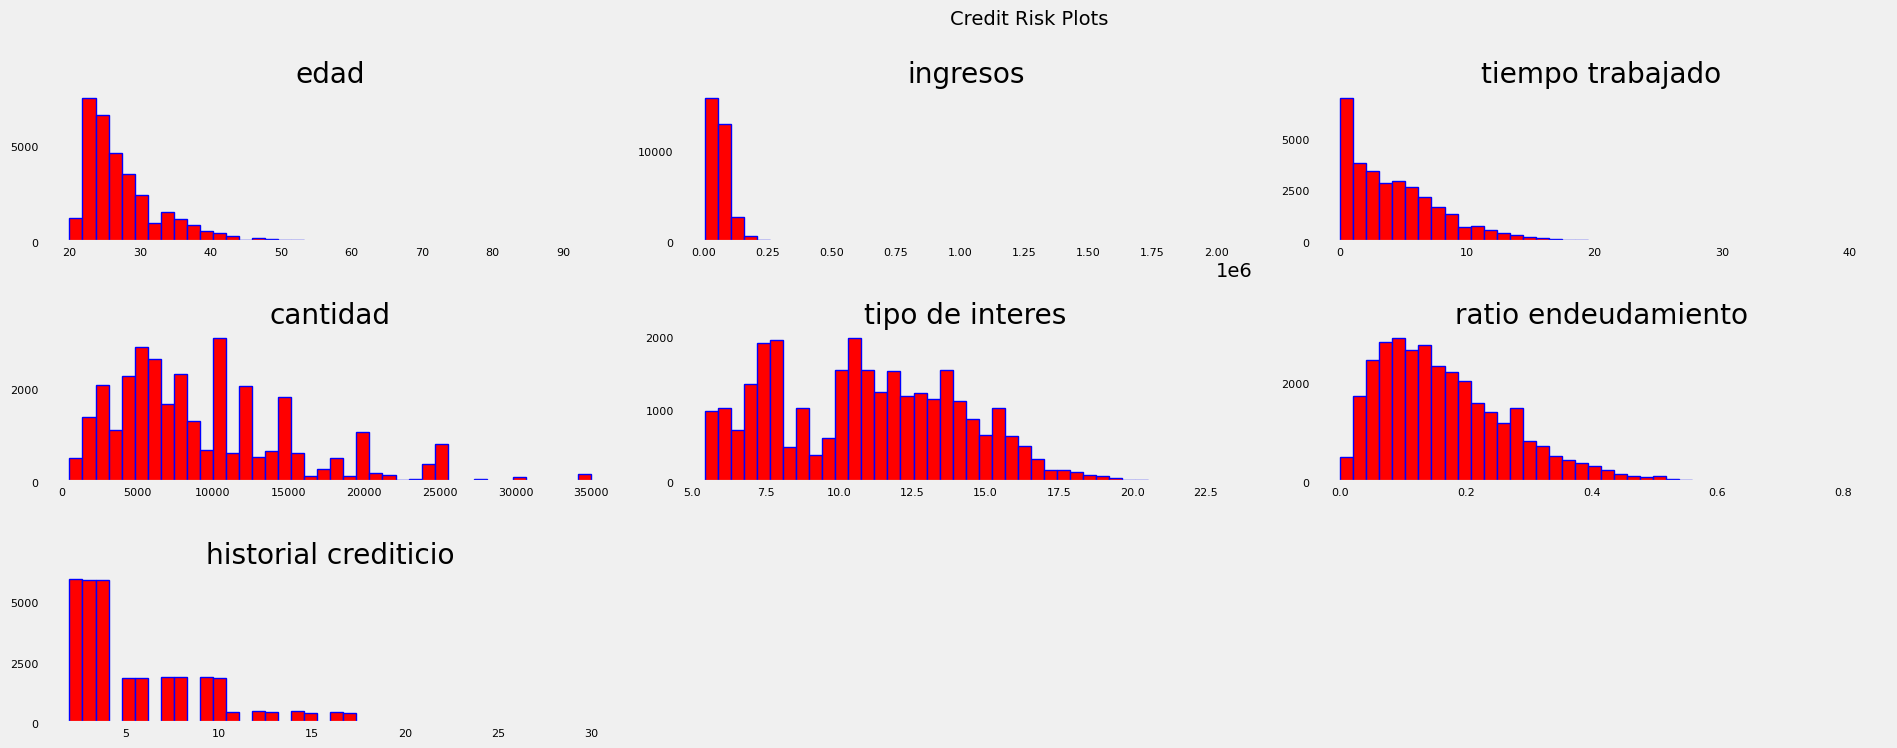

In [8]:
target = 'solvencia'
features_list = list(df.columns)
features_list.remove(target)
print(features_list)

df[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Credit Risk Plots', x=0.65, y=1.25, fontsize=14); 

Vemos de forma gráfica lo anterior. Solo el ratio y el tiempo trabajado tienen valores 0.

Hemos observado anteriormente mediante estadísticas descriptivas, que tanto tiempo trabajado como tipo de interés tienen valores nulos. Vamos a observarlo.

In [9]:
#Valores nulos
nan_df_tt = df[df['tiempo trabajado'].isna()]
nan_df_tt

edad  ingresos  vivienda  tiempo trabajado    motivo scoring  cantidad  \
103      22     12600  hipoteca               NaN  personal       A      2000   
218      24    185000  hipoteca               NaN  estudios       B     35000   
375      24     16800  hipoteca               NaN     deuda       A      3900   
403      25     52000  alquiler               NaN  personal       B     24000   
404      22     17352  hipoteca               NaN  estudios       C      2250   
...     ...       ...       ...               ...       ...     ...       ...   
32279    38     12000    pagada               NaN  estudios       A      4800   
32321    51     18408  alquiler               NaN  personal       C      1000   
32353    70     39996  alquiler               NaN    medico       C      3600   
32446    56     32400  alquiler               NaN    medico       A      8575   
32464    53     54000  alquiler               NaN    medico       D     10000   

       tipo de interes  solvencia  ratio endeudamiento impagos  \
103               5.42          1                 0.16      no   
218              12.42          0                 0.19      no   
375                NaN          1                 0.23      no   
403              10.74          1                 0.46      no   
404              15.27          0                 0.13      si   
...                ...        ...                  ...     ...   
32279             7.29          1                 0.40      no   
32321            14.65          1                 0.05      si   
32353            15.23          0                 0.09      si   
32446             7.51          0                 0.26      no   
32464            14.59          1                 0.19      si   

       historial crediticio  
103                       4  
218                       2  
375                       3  
403                       2  
404                       3  
...                     ...  
32279                    12  
32321                    20  
32353                    19  
32446                    18  
32464                    27  

[895 rows x 12 columns]

Vemos como efectivamente tiempo trabajado tiene valores no nulos. Procesamos los datos y les asignamos la media.

In [10]:
nan_df_tc = df[df['tipo de interes'].isna()]
nan_df_tc

edad  ingresos  vivienda  tiempo trabajado    motivo scoring  cantidad  \
38       23     71500  alquiler               3.0     deuda       D     30000   
49       24     78000  alquiler               4.0     deuda       D     30000   
56       23    277000    pagada               3.0  personal       A     35000   
58       24     12000    pagada               2.0     viaje       D      1750   
61       26    263000  hipoteca               0.0  estudios       B     10000   
...     ...       ...       ...               ...       ...     ...       ...   
32540    53      4888    pagada               0.0     viaje       C      1400   
32545    65     45900  alquiler               2.0  estudios       C     10000   
32546    54     20000  alquiler               2.0    medico       C      5000   
32562    51     60000  hipoteca               1.0  personal       A      7500   
32563    58     72000  alquiler               5.0   reforma       B      4500   

       tipo de interes  solvencia  ratio endeudamiento impagos  \
38                 NaN          1                 0.42      no   
49                 NaN          1                 0.38      si   
56                 NaN          0                 0.13      no   
58                 NaN          0                 0.15      si   
61                 NaN          1                 0.04      no   
...                ...        ...                  ...     ...   
32540              NaN          1                 0.29      si   
32545              NaN          0                 0.22      si   
32546              NaN          0                 0.25      no   
32562              NaN          0                 0.13      no   
32563              NaN          0                 0.06      no   

       historial crediticio  
38                        4  
49                        4  
56                        4  
58                        3  
61                        4  
...                     ...  
32540                    28  
32545                    19  
32546                    28  
32562                    23  
32563                    23  

[3115 rows x 12 columns]

Vemos como tipo de intereses muestra valores NaN, algo que no nos proporciona ninguna información. En este caso un valor de 0 no tiene mucho sentido debido a que todo crédito tendrá algun tipo de interés por muy pequeño que este sea. Por ello, procesamos los datos y a los valores NaN les asignamos la media.

In [11]:
# Asignar la media de cada columna a los valores nulos
df.fillna(df.mean(), inplace=True)
df

edad  ingresos  vivienda  tiempo trabajado    motivo scoring  cantidad  \
0        21      9600    pagada               5.0  estudios       B      1000   
1        25      9600  hipoteca               1.0    medico       C      5500   
2        23     65500  alquiler               4.0    medico       C     35000   
3        24     54400  alquiler               8.0    medico       C     35000   
4        21      9900    pagada               2.0     viaje       A      2500   
...     ...       ...       ...               ...       ...     ...       ...   
32569    57     53000  hipoteca               1.0  personal       C      5800   
32570    54    120000  hipoteca               4.0  personal       A     17625   
32571    65     76000  alquiler               3.0   reforma       B     35000   
32572    56    150000  hipoteca               5.0  personal       B     15000   
32573    66     42000  alquiler               2.0    medico       B      6475   

       tipo de interes  solvencia  ratio endeudamiento impagos  \
0                11.14          0                 0.10      no   
1                12.87          1                 0.57      no   
2                15.23          1                 0.53      no   
3                14.27          1                 0.55      si   
4                 7.14          1                 0.25      no   
...                ...        ...                  ...     ...   
32569            13.16          0                 0.11      no   
32570             7.49          0                 0.15      no   
32571            10.99          1                 0.46      no   
32572            11.48          0                 0.10      no   
32573             9.99          0                 0.15      no   

       historial crediticio  
0                         2  
1                         3  
2                         2  
3                         4  
4                         2  
...                     ...  
32569                    30  
32570                    19  
32571                    28  
32572                    26  
32573                    30  

[32574 rows x 12 columns]

Queremos transformar las columnas que almacenan cadenas de texto para que representen esa información como números naturales. Esto funciona de la siguiente forma: 
Para calcular los valores numéricos lo primero que hacemos es seleccionar la columna, la reinterpretamos como una categoría astype('category') y finalmente nos quedamos con la secuencia de su representación numérica (cat.codes).
Al reinterpretar la columna como una categoría, se recorren los valores detectando los valores únicos y dándoles una representación numérica única.

In [12]:
df['vivienda'] = df['vivienda'].astype('category').cat.codes
df['scoring'] = df['scoring'].astype('category').cat.codes
df['impagos'] = df['impagos'].astype('category').cat.codes
df['motivo'] = df['motivo'].astype('category').cat.codes
df

edad  ingresos  vivienda  tiempo trabajado  motivo  scoring  cantidad  \
0        21      9600         2               5.0       1        1      1000   
1        25      9600         1               1.0       2        2      5500   
2        23     65500         0               4.0       2        2     35000   
3        24     54400         0               8.0       2        2     35000   
4        21      9900         2               2.0       5        0      2500   
...     ...       ...       ...               ...     ...      ...       ...   
32569    57     53000         1               1.0       3        2      5800   
32570    54    120000         1               4.0       3        0     17625   
32571    65     76000         0               3.0       4        1     35000   
32572    56    150000         1               5.0       3        1     15000   
32573    66     42000         0               2.0       2        1      6475   

       tipo de interes  solvencia  ratio endeudamiento  impagos  \
0                11.14          0                 0.10        0   
1                12.87          1                 0.57        0   
2                15.23          1                 0.53        0   
3                14.27          1                 0.55        1   
4                 7.14          1                 0.25        0   
...                ...        ...                  ...      ...   
32569            13.16          0                 0.11        0   
32570             7.49          0                 0.15        0   
32571            10.99          1                 0.46        0   
32572            11.48          0                 0.10        0   
32573             9.99          0                 0.15        0   

       historial crediticio  
0                         2  
1                         3  
2                         2  
3                         4  
4                         2  
...                     ...  
32569                    30  
32570                    19  
32571                    28  
32572                    26  
32573                    30  

[32574 rows x 12 columns]

La vivienda ahora está representada numéricamente. De tal forma que:
- Alquiler: 0
- Hipoteca: 1
- Pagada: 2

De igual forma con scoring:
- A: 0
- B: 1
- C: 2

Impagos:
- No: 0
- Si: 1

### Distribución de solvencias

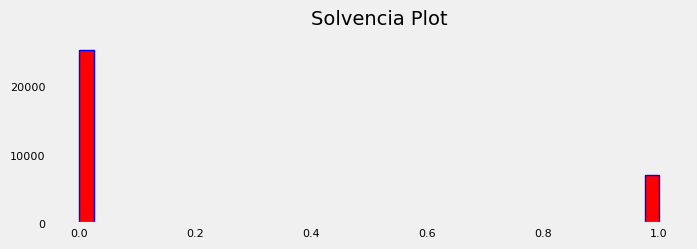

In [13]:
df[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red') 

plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Solvencia Plot', x=0.65, y=1.25, fontsize=14);  

El 0 indicará  aquellas personas que han cumplido con sus obligaciones de pago y el 1 las que tienen un impago.

### Análisis multivariante

Aunque ya lo visualizamos anteriormente lo volvemos a hacer para verlo más detenidamente.

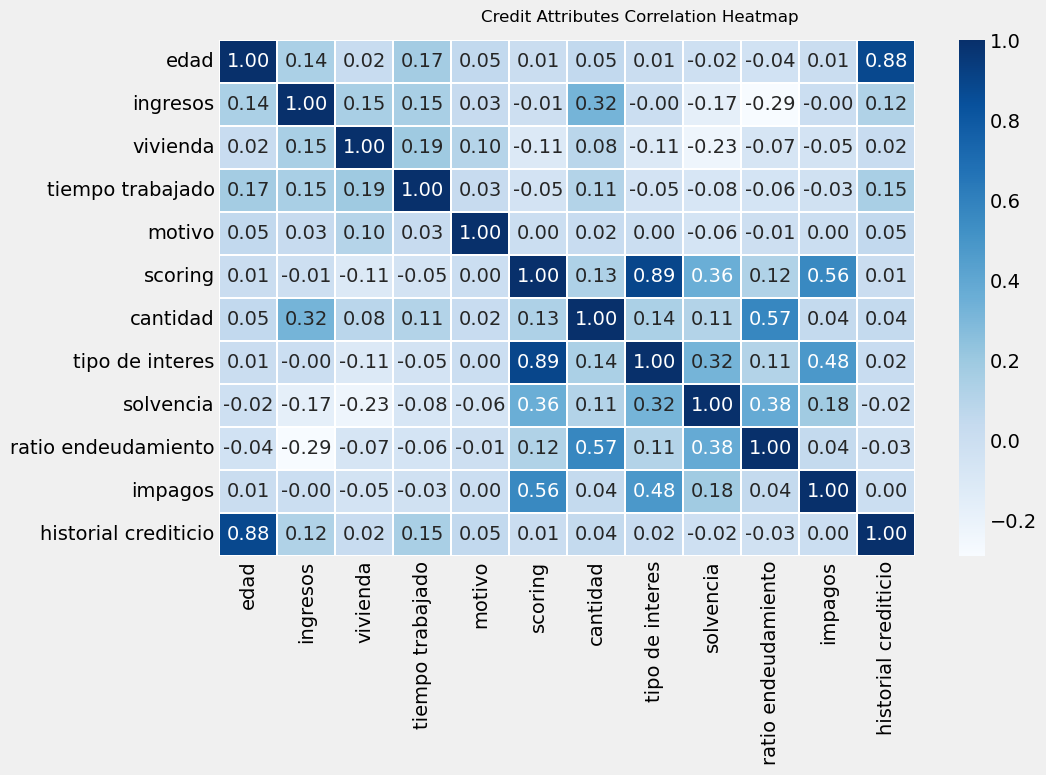

In [14]:
# Visualizamos las correlaciones
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Credit Attributes Correlation Heatmap', fontsize=12)

Vemos como solamente hay varias variables altamente correlacionadas:
- edad-historial crediticio: A mayor edad más veces habrás necesitado pedir un préstamo. 
- Scoring-tipo de interes: la puntuación del crédito (scoring) se utiliza como una herramienta para medir el riesgo asociado a otorgarle el crédito. Esta puntuación se utiliza para determinar el tipo de interés que se aplicará al préstamo, por lo que scoring y tipo de intereses estarán muy relacionadas. Una puntuación alta quiere decir que el prestamista precibe un gran riesgo, por lo que el tipo de interes será más alto.

Sin embargo, parece que hay algunas variables que presentan cierta correlación, como es el caso de:
- Cantidad-ratio endeudamiento: Esto es razonable pues un mayor porcentaje del préstamo frente a las ganacias quiere decir que la cantidad del préstamo es más elevada. Así a mayor préstamo, mayor será dicho porcentaje.
- scoring-impagos: están relacionados por la propia definción del scoring. Debido a que este se asigna en función de si se percibe riesgo de impago. No están altamente relacionadas porque simplemente es una idea del prestamista acerca del cliente, y no hay un modelo predictivo de por medio.
- impagos - tipo de interes: cuanto mayor sea el tipo de interes mayor será la propabilidad de impago.

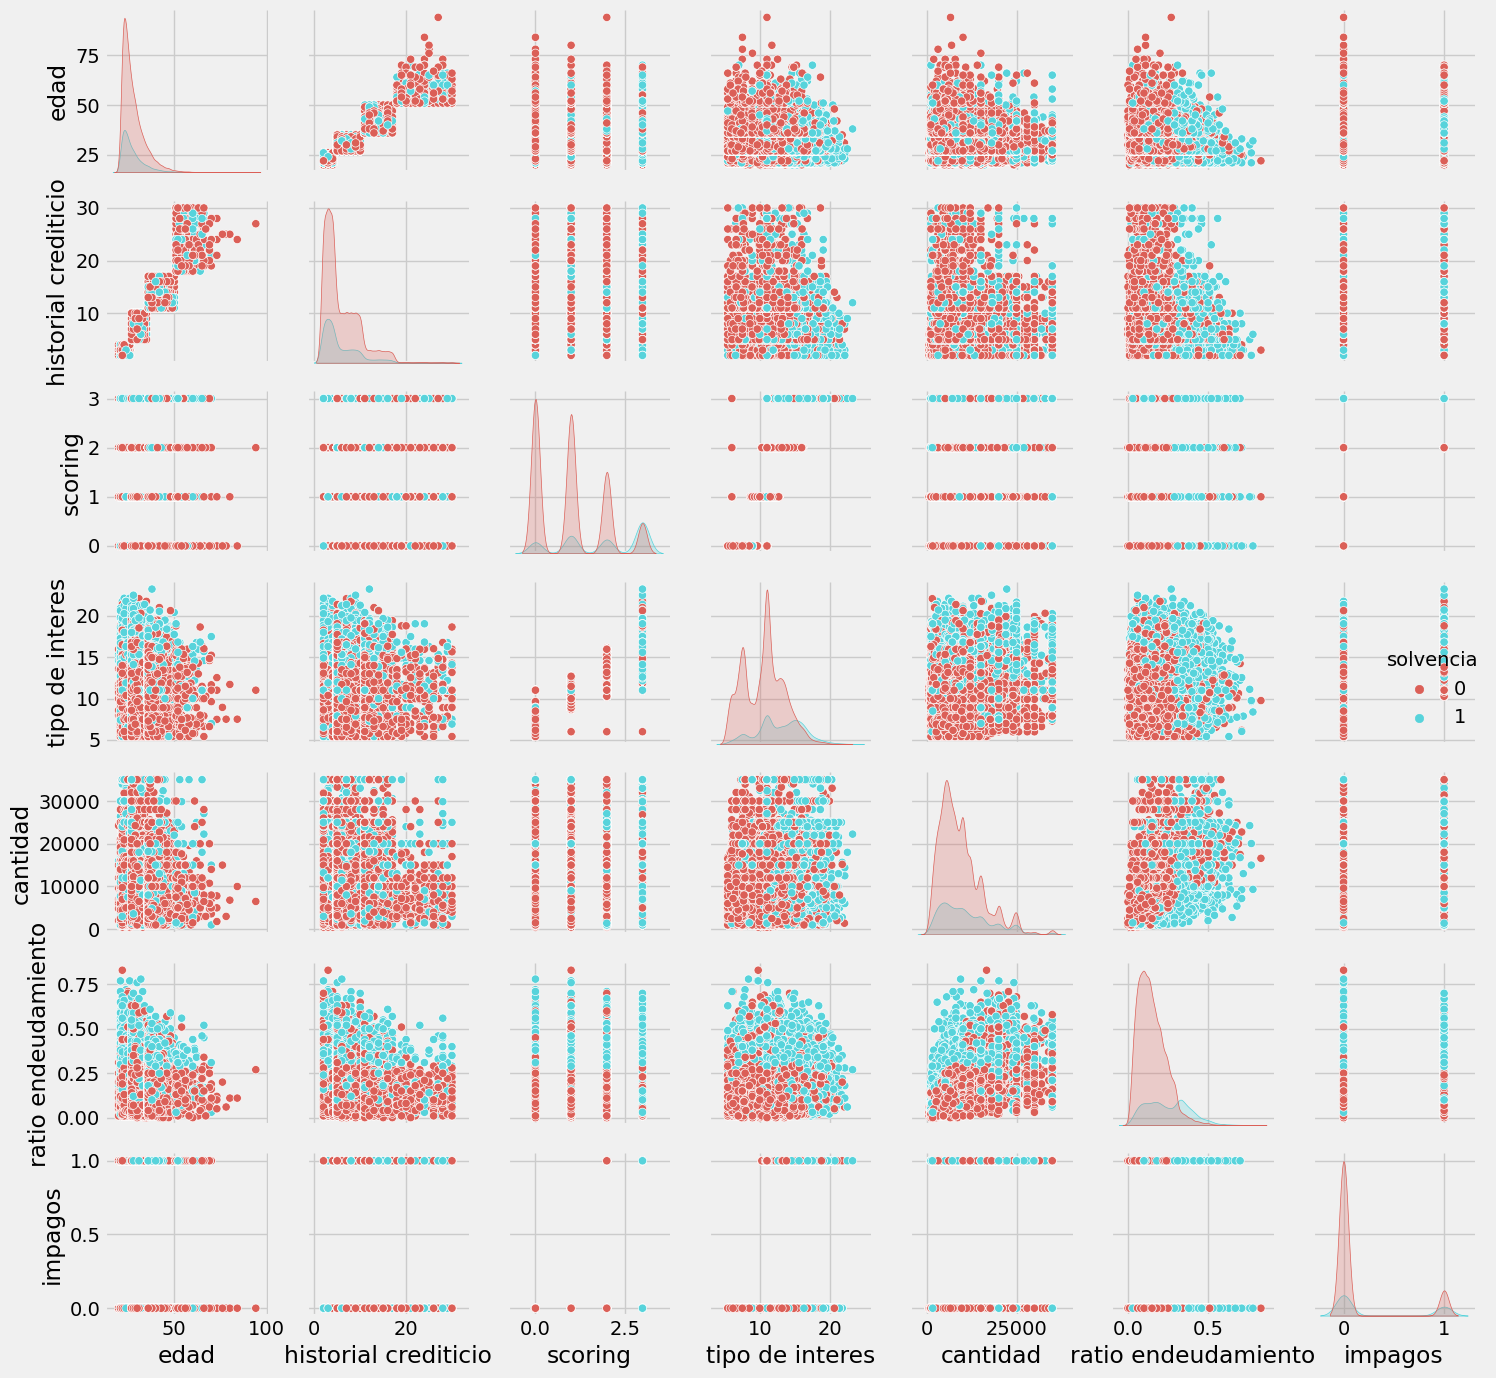

In [16]:
sns.pairplot( df.dropna(), vars=[ 'edad', 'historial crediticio', 'scoring', 'tipo de interes', 'cantidad', 'ratio endeudamiento', 'impagos' ], size=2, diag_kind='kde', palette='hls', hue='solvencia' )
plt.tight_layout( )
plt.show()

Únicamente se aprecia la correlacion entre edad-historial crediticio y scoring-tipo de interes.

Fijándonos en la diagonal vemos con la gente que ha pagado su préstamo es la que tiene mayores valores en todas las variables.

Además existen columnas que pueden ser eliminadas porque no están directamente relacionadas con la solvencia, como es el caso del motivo del crédito.

In [15]:
df = df.drop("motivo", axis=1)
df

edad  ingresos  vivienda  tiempo trabajado  scoring  cantidad  \
0        21      9600         2               5.0        1      1000   
1        25      9600         1               1.0        2      5500   
2        23     65500         0               4.0        2     35000   
3        24     54400         0               8.0        2     35000   
4        21      9900         2               2.0        0      2500   
...     ...       ...       ...               ...      ...       ...   
32569    57     53000         1               1.0        2      5800   
32570    54    120000         1               4.0        0     17625   
32571    65     76000         0               3.0        1     35000   
32572    56    150000         1               5.0        1     15000   
32573    66     42000         0               2.0        1      6475   

       tipo de interes  solvencia  ratio endeudamiento  impagos  \
0                11.14          0                 0.10        0   
1                12.87          1                 0.57        0   
2                15.23          1                 0.53        0   
3                14.27          1                 0.55        1   
4                 7.14          1                 0.25        0   
...                ...        ...                  ...      ...   
32569            13.16          0                 0.11        0   
32570             7.49          0                 0.15        0   
32571            10.99          1                 0.46        0   
32572            11.48          0                 0.10        0   
32573             9.99          0                 0.15        0   

       historial crediticio  
0                         2  
1                         3  
2                         2  
3                         4  
4                         2  
...                     ...  
32569                    30  
32570                    19  
32571                    28  
32572                    26  
32573                    30  

[32574 rows x 11 columns]

## Modelos de Machine Learning

In [16]:
# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold

from sklearn import model_selection

In [17]:
df

edad  ingresos  vivienda  tiempo trabajado  scoring  cantidad  \
0        21      9600         2               5.0        1      1000   
1        25      9600         1               1.0        2      5500   
2        23     65500         0               4.0        2     35000   
3        24     54400         0               8.0        2     35000   
4        21      9900         2               2.0        0      2500   
...     ...       ...       ...               ...      ...       ...   
32569    57     53000         1               1.0        2      5800   
32570    54    120000         1               4.0        0     17625   
32571    65     76000         0               3.0        1     35000   
32572    56    150000         1               5.0        1     15000   
32573    66     42000         0               2.0        1      6475   

       tipo de interes  solvencia  ratio endeudamiento  impagos  \
0                11.14          0                 0.10        0   
1                12.87          1                 0.57        0   
2                15.23          1                 0.53        0   
3                14.27          1                 0.55        1   
4                 7.14          1                 0.25        0   
...                ...        ...                  ...      ...   
32569            13.16          0                 0.11        0   
32570             7.49          0                 0.15        0   
32571            10.99          1                 0.46        0   
32572            11.48          0                 0.10        0   
32573             9.99          0                 0.15        0   

       historial crediticio  
0                         2  
1                         3  
2                         2  
3                         4  
4                         2  
...                     ...  
32569                    30  
32570                    19  
32571                    28  
32572                    26  
32573                    30  

[32574 rows x 11 columns]

In [18]:
import seaborn as sns

target = df.iloc[:, 7] #coge la clase
dfCl = df.iloc[:, list(range(0,7))+list(range(8,11))]  #coge las variables independientes


In [19]:
target

0        0
1        1
2        1
3        1
4        1
        ..
32569    0
32570    0
32571    1
32572    0
32573    0
Name: solvencia, Length: 32574, dtype: int64

In [20]:
dfCl

edad  ingresos  vivienda  tiempo trabajado  scoring  cantidad  \
0        21      9600         2               5.0        1      1000   
1        25      9600         1               1.0        2      5500   
2        23     65500         0               4.0        2     35000   
3        24     54400         0               8.0        2     35000   
4        21      9900         2               2.0        0      2500   
...     ...       ...       ...               ...      ...       ...   
32569    57     53000         1               1.0        2      5800   
32570    54    120000         1               4.0        0     17625   
32571    65     76000         0               3.0        1     35000   
32572    56    150000         1               5.0        1     15000   
32573    66     42000         0               2.0        1      6475   

       tipo de interes  ratio endeudamiento  impagos  historial crediticio  
0                11.14                 0.10        0                     2  
1                12.87                 0.57        0                     3  
2                15.23                 0.53        0                     2  
3                14.27                 0.55        1                     4  
4                 7.14                 0.25        0                     2  
...                ...                  ...      ...                   ...  
32569            13.16                 0.11        0                    30  
32570             7.49                 0.15        0                    19  
32571            10.99                 0.46        0                    28  
32572            11.48                 0.10        0                    26  
32573             9.99                 0.15        0                    30  

[32574 rows x 10 columns]

Dividimos un DataFrame en dos conjuntos, uno de entrenamiento y otro de prueba, para luego ajustar un modelo de aprendizaje automático al conjunto de entrenamiento y evaluar su rendimiento en el conjunto de prueba.

La división se realiza utilizando la función train_test_split de la biblioteca Scikit-Learn. Esta función toma el DataFrame dfCl y la variable objetivo target como argumentos y devuelve cuatro conjuntos: X_train, X_test, y_train e y_test. Los conjuntos X_train y y_train se utilizan para ajustar el modelo de aprendizaje automático, mientras que los conjuntos X_test e y_test se utilizan para evaluar su rendimiento.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dfCl,
                                                    target,
                                                    test_size=0.20, # 20 por ciento de los datos de test
                                                    random_state=7, # para que la división se realice de la misma manera en diferentes ejecuciones del código
                                                    stratify=target)  # para que la proporción de clases se mantenga en ambas divisiones
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (26059, 10)
Number transactions y_train dataset:  (26059,)
Number transactions X_test dataset:  (6515, 10)
Number transactions y_test dataset:  (6515,)


En esta segunda fase de preprocesado, realizamos un escalado al rango [0,1] de todos los atributos.

La transformación de escala se realiza para normalizar los valores de las características del conjunto de datos y ponerlos en una escala común. En este caso, se utiliza el método Min-Max para escalar los datos, lo que significa que los valores se escalan de tal manera que el valor mínimo de la característica se mapea a 0 y el valor máximo se mapea a 1. Esto es útil para evitar que características con valores más grandes dominen características con valores más pequeños en el proceso de entrenamiento del modelo de aprendizaje automático.

In [22]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
train_X_1 = min_max_scaler.fit_transform(X_train)

print(type(train_X_1))
print(train_X_1.shape)
print(train_X_1.dtype)
train_X_1

<class 'numpy.ndarray'>
(26059, 10)
float64


array([[0.296875  , 0.04715628, 0.5       , ..., 0.14457831, 0.        ,
        0.39285714],
       [0.203125  , 0.06189262, 0.5       , ..., 0.22891566, 1.        ,
        0.28571429],
       [0.125     , 0.01964845, 0.        , ..., 0.13253012, 0.        ,
        0.17857143],
       ...,
       [0.046875  , 0.01620997, 0.        , ..., 0.3373494 , 0.        ,
        0.07142857],
       [0.0625    , 0.02357814, 0.5       , ..., 0.26506024, 0.        ,
        0.03571429],
       [0.1875    , 0.01522755, 0.        , ..., 0.19277108, 0.        ,
        0.10714286]])

Como disponemos de un conjunto de datos de entrenamiento para 'entrenar' el modelo debemos usar un modelo supervisado. Además al tratarse de una predicción de la variable 'solvencia' la cual tiene dos valores posibles (0 o 1) (pago o impago), deberemos usar modelos de clasificación. 

Para ello seleccionamos varios algoritmos de aprendizaje automático y evaluamos su rendimiento mediante validación cruzada (en lugar de dividir los datos en un conjunto de entrenamiento y otro de prueba, la evaluación cruzada divide los datos en varios subconjuntos o "folds" (pliegues) y realiza el entrenamiento y la evaluación del modelo en múltiples iteraciones, utilizando diferentes combinaciones de subconjuntos de entrenamiento y prueba).  

La evaluación se realiza mediante la medición de la precisión (accuracy) y la curva ROC-AUC para cada modelo.

In [55]:
# selección de algoritmos a tener en cuenta y establecimiento de medidas de rendimiento
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7, ### el random es para que se vuelva a repetir salga algo parecido
                                                         class_weight='balanced'))) ### Que intente balancear 0 y 1 en el analísis de entrenamiento
###datos balanceados para que no coja mucho de unos y no de otros
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('XGboost', XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)))

In [56]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold( ### Kfold para coger una muestra
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)
### la regresión logistica sería muy buena para utilizarla
### Con ROC AUC Mean decido el modelo a utilizar

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
6                   XGboost         93.26         0.63          91.40   
1             Random Forest         91.43         0.73          90.82   
0       Logistic Regression         81.94         1.18          72.30   
4  Decision Tree Classifier         81.20         0.79          86.72   
3                       KNN         81.01         1.15          83.38   
2                       SVM         78.04         1.05          80.30   
5               Gaussian NB         77.37         1.10          81.79   

   Accuracy STD  
6          0.36  
1          0.38  
0          1.62  
4          0.49  
3          0.62  
2          0.60  
5          0.60

En nuestro caso estamos buscando maximizar el número de falsos positivos, es decir, acercarse con mayor precisión al número real de personas que no han realizado el pago aunque para ello ciertas personas que si han realizado el pago se les considere erróneamente que no. Pero tenemos un conjuntos de datos desequilibrado, donde hay más gente que ha pagado a gente que no. Por ello, nos basaremos en el algoritmo ROC AUC para saber cuál es el modelo que nos dará un mejor resultado. En este caso tanto con el método ROC AUC como el de "precisión" el mejor modelo es XGboost.

> La curva AUC - ROC es una medida de rendimiento para el problema de clasificación en varios ajustes de umbrales. La ROC es una curva de probabilidad y la AUC representa el grado o la medida de separabilidad. Indica en qué medida el modelo es capaz de distinguir entre clases. <br>

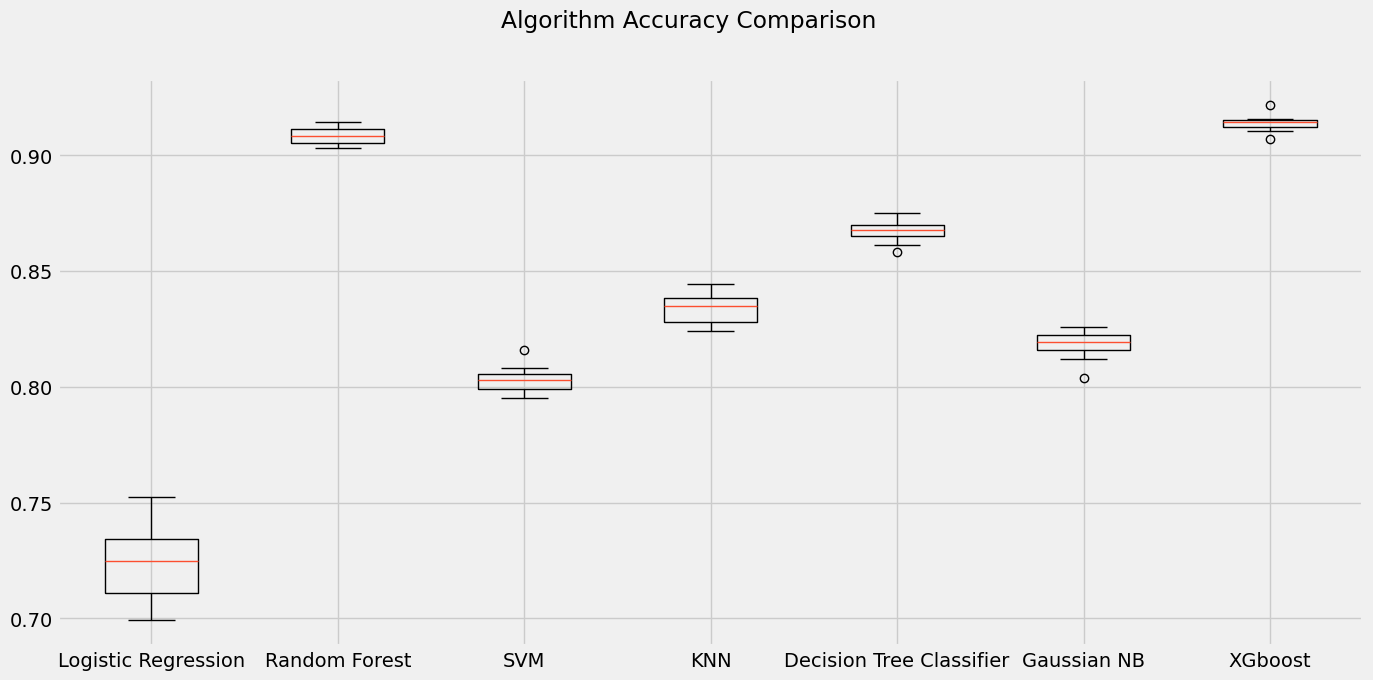

In [57]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

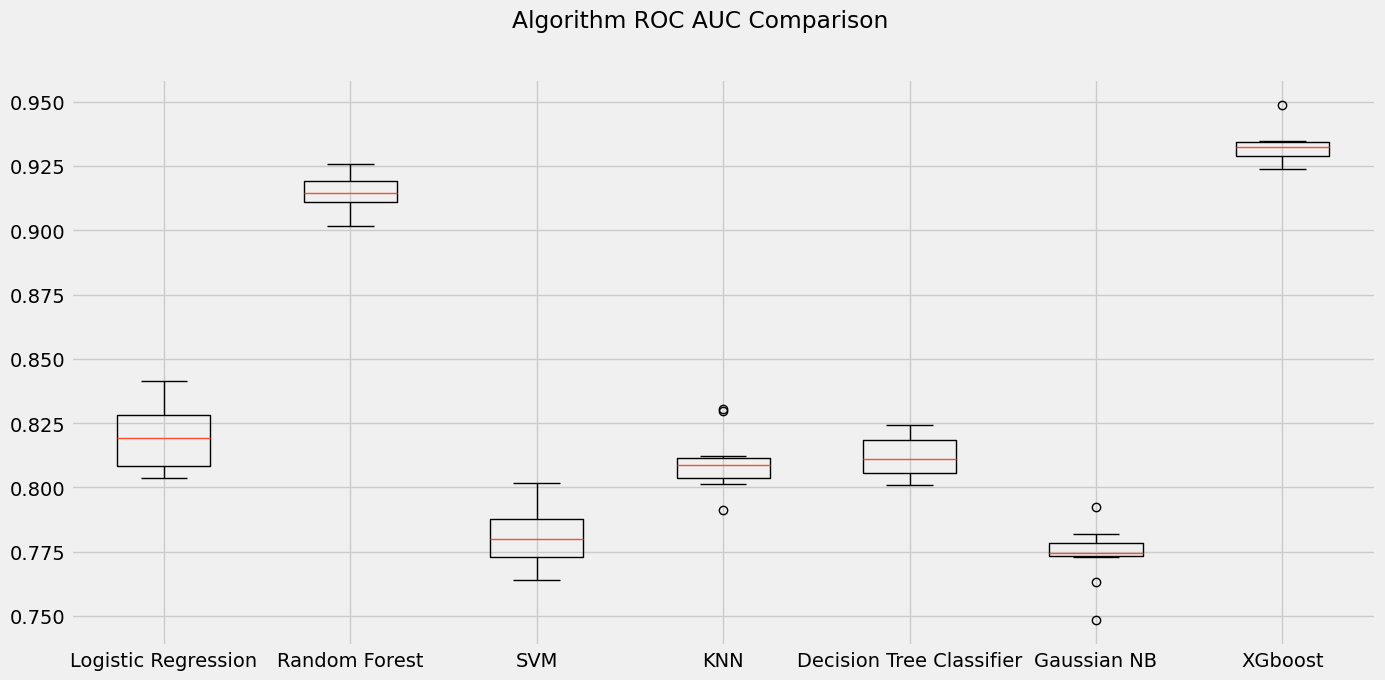

In [58]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

### XGboost

XGBoost es un algoritmo de aprendizaje automático basado en árboles de decisión que se utiliza para la clasificación y la regresión.

El modelo XGBoost utiliza un conjunto de árboles de decisión, cada uno de los cuales proporciona una predicción de la variable objetivo. Estos árboles se crean de forma secuencial, mejorando cada vez el modelo anterior, en función de los errores cometidos por el modelo en las iteraciones anteriores. Para hacer esto, XGBoost utiliza una técnica llamada "boosting", que consiste en asignar pesos a las muestras de entrenamiento de forma que los errores cometidos en las muestras más difíciles de predecir sean penalizados con más fuerza que los errores cometidos en las muestras más fáciles.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [25]:
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=33, ...)

In [26]:
xgb_predictions = xgb.predict(X_test)

In [27]:
# Diseñamos una función de evaluación de clasificación simple
from sklearn.metrics import roc_auc_score
def evaluation_scores(test, prediction, target_names=None):
    print('Precisión:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('ROC-AUC:', np.round(roc_auc_score(test, prediction), 4))
    print('-'*60)
    print('Informe de clasificación:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
    
    print('-'*60)
    print('Matriz de confusión:\n')
    print(cm) 

La métrica F1 es una medida de la precisión de un modelo de clasificación binaria, que combina las métricas de precisión y recuperación (también conocidas como sensibilidad) en una sola medida.

La precisión mide la proporción de instancias positivas identificadas correctamente por el modelo, es decir, el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos positivos. Por otro lado, la recuperación mide la proporción de instancias positivas que son correctamente identificadas por el modelo, es decir, el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos negativos.

La métrica F1 es la media armónica de precisión y recuperación, y su valor varía entre 0 y 1, donde un valor de 1 indica que el modelo tiene una precisión y recuperación perfectas, mientras que un valor de 0 indica que el modelo no tiene precisión ni recuperación. En general, se considera que un valor de F1 alto indica un buen rendimiento del modelo.

In [28]:
# Evaluamos las predicciones
evaluation_scores(y_test, xgb_predictions, target_names=['Low Quality', 'Hight Quality'])

Precisión: 0.9117
ROC-AUC: 0.8261
------------------------------------------------------------
Informe de clasificación:

                precision    recall  f1-score   support

  Low Quality       0.91      0.98      0.95      5094
Hight Quality       0.90      0.67      0.77      1421

     accuracy                           0.91      6515
    macro avg       0.91      0.83      0.86      6515
 weighted avg       0.91      0.91      0.91      6515

------------------------------------------------------------
Matriz de confusión:

[[4982  112]
 [ 463  958]]


Text(0.5, 427.9555555555555, 'Predicted label')

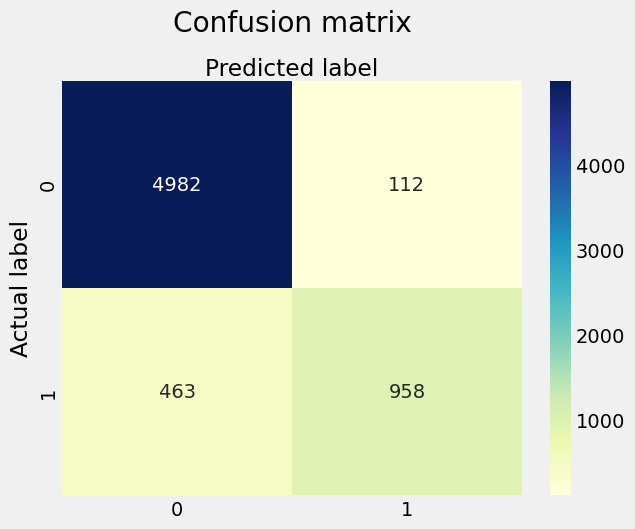

In [29]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, xgb.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Muy buen modelo con un 91,17% de precisión y con una métrica F1 cercana al 1.

En la tabla de confusión vemos como hay gran cantidad de verdaderos positivos (4982) frente a falsos positivos (112), es decir, el modelo predice muy bien la cantidad de personas que sí han realizado el pago (verdaderos positivos). Aunque para ello se tenga que renunciar un poco a que existan muchos falsos negativos (463) que son personas que no han realizado su pago pero se les considera que sí. Este modelo puede venir bien para reducir pérdidas del banco, pues les hace saber con mucha exactitud todas aquellas personas a las que sí se les debe dar un crédito.

### Random forest

Se crea un conjunto de árboles de decisión (un "bosque") en lugar de un solo árbol, y los resultados finales se promedian para mejorar la precisión y reducir el sobreajuste.

Cada árbol de decisión en el bosque se construye de forma independiente utilizando una selección aleatoria de datos de entrenamiento y características (variables predictoras) del conjunto de datos. De esta manera, cada árbol en el bosque es ligeramente diferente, lo que permite una mayor diversidad y precisión en las predicciones.

En la etapa de predicción, el modelo realiza una votación de la predicción de cada árbol y toma la predicción que se presenta con mayor frecuencia en el bosque. Esto ayuda a reducir el impacto de los errores individuales de cada árbol.

In [30]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [31]:
clf = tree.DecisionTreeClassifier()
# Entrenando nuestro modelo
clf = clf.fit(X_train, y_train)
Y_pred_test = clf.predict(X_test)

In [32]:
np.mean(y_test == Y_pred_test) ### Mejoramos con respecto al algoritmo anterior

0.8753645433614735

In [33]:
# Vamos a comparar con RandomForest, generamos 100 árboles y que utilice todos los núcleos de nuestro PC

clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf.fit(X_train, y_train)
Y_pred_test = clf.predict(X_test)

# Clasificamos las variables con mayor importancia.
print("El orden de las variables es:")
print(dfCl.columns)

clf.feature_importances_


El orden de las variables es:
Index(['edad', 'ingresos', 'vivienda', 'tiempo trabajado', 'scoring',
       'cantidad', 'tipo de interes', 'ratio endeudamiento', 'impagos',
       'historial crediticio'],
      dtype='object')


array([0.05101487, 0.16665916, 0.10315657, 0.07235995, 0.10242882,
       0.0846367 , 0.12813074, 0.23692536, 0.01280296, 0.04188487])

Las variables con mayor importancia son "ratio endeudamiento" e "ingresos".

In [34]:
np.mean(y_test == Y_pred_test)

0.9075978511128165

In [35]:
roc_auc = roc_auc_score(y_test, Y_pred_test)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.8122798081500584


El siguiente código hace lo mismo usando validación cruzada por lo que daría un mejor resultado pero debido al tiempo de ejecución nos quedaremos con el anterior.

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=None)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

In [ ]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Logistic Regression

In [36]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=None)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.82 (0.01)


In [37]:
# sklearn modules for ML model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [38]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=None), return_train_score=True, 
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)
### random_state=None para que cada vez lo haga diferente

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.7409999999999999, class_weight='balanced',
                   solver='liblinear')
best params: {'C': 0.7409999999999999}
best score: 0.8229199271666753


Text(0.5, 427.9555555555555, 'Predicted label')

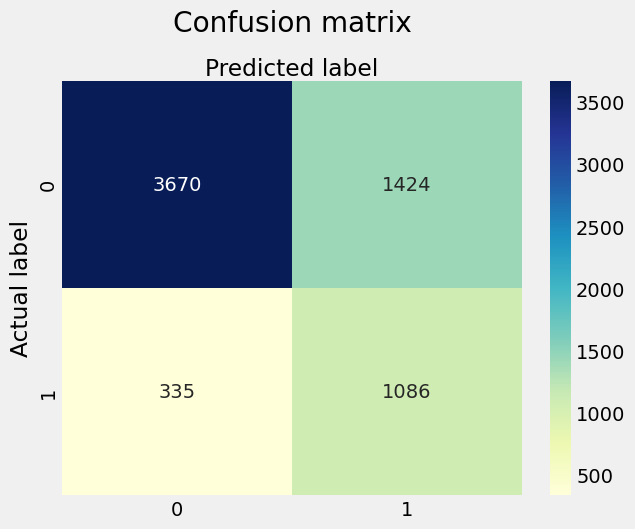

In [39]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Este modelo tiene peor rendimiento por lo que predice de peor forma los verdaderos positivos (personas con pago realizado). Sin embargo, el número de falsos negativos es menor que con XGboost (335). La elección de un modelo u otro dependerá de que estemos buscando. En nuestro caso, nos vendrá mejor el uso de XGboost porque aunque predice peor las personas que no van a pagar, tiene menos falsos positivos (personas a las que concederíamos un crédito pensando que van a pagar pero luego no lo harán) por lo que es beneficioso para el banco.

## Interpretabilidad

Los modelos no paramétricos, como los modelos basados en árboles como XGBoost, son más difíciles de interpretar porque su número total de parámetros no es fijo y crecerá con el volumen de datos utilizados para el entrenamiento. Los modelos paramétricos (por ejemplo, la regresión logística) ofrecen, por el contrario, un primer nivel de interpretación a través de sus coeficientes (pero, de hecho, ni siquiera esto es completamente trivial). En ese caso, las técnicas de regularización como L1-regularización/LASSO pueden ser útiles para reducir el espacio de características y mejorar la interpretabilidad del modelo. Para los modelos no paramétricos, afortunadamente, muchos de ellos, como XGBoost, dan acceso a métodos de interpretación como la importancia de las características para ayudarnos a entender la evaluación interna del modelo para hacer sus predicciones.

Para interpretar un modelo, básicamente necesitamos saber

- Qué características son las más importantes en el modelo.
- El efecto de cada característica en una predicción concreta.
- Los efectos de cada característica en un gran número de predicciones.

Los cálculos nativos de la importancia global de las características que vienen con XGBoostare se basan en los siguientes parámetros:

- Peso de las características: se basa en el número de veces que una característica aparece en un árbol en el conjunto de árboles.
- Cobertura: la cobertura media (número de muestras afectadas) de las divisiones que utilizan la característica.
- Ganancia: la ganancia media de las divisiones que utilizan la característica.

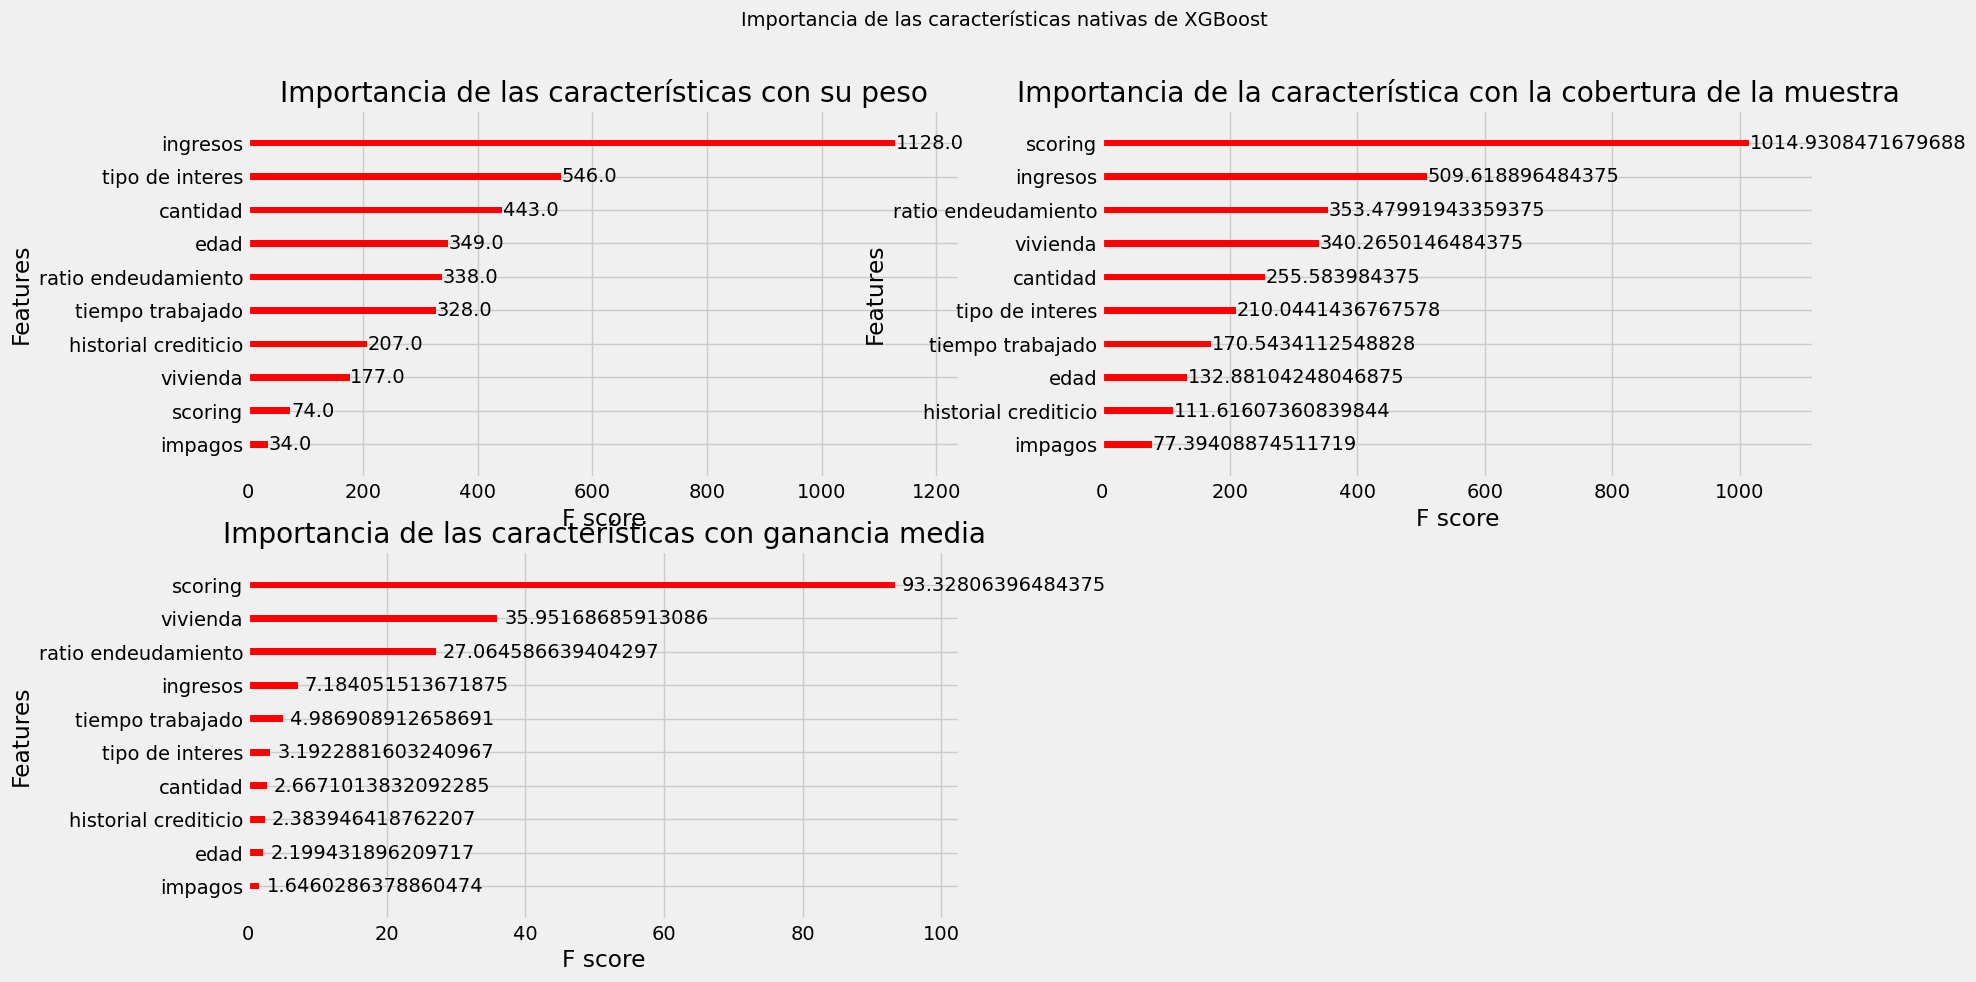

In [40]:
# Trazando la importancia de las características de XGBoost
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Importancia de las características nativas de XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Importancia de las características con su peso");

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Importancia de la característica con la cobertura de la muestra");

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Importancia de las características con ganancia media");

In [41]:
! pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Defaulting to user installation because normal site-packages is not writeable


### Modelo ELI5

ELI5 proporciona herramientas para analizar y comprender cómo un modelo toma decisiones al resaltar las características y las contribuciones de cada característica a las predicciones del modelo.

Las características tienen un peso dentro del modelo y estas a su vez un error.  

Cuando se dice que una característica tiene más peso según el modelo ELI5, significa que esa característica tiene una mayor influencia o contribución en las predicciones realizadas por el modelo de aprendizaje automático. En otras palabras, es una indicación de que esa característica tiene un impacto más significativo en el resultado final del modelo.


In [42]:
eli5.show_weights(xgb.get_booster())

In [43]:
# necesitamos reentrenar un nuevo modelo con arrays
# ya que eli5 tiene un error con Dataframes y XGBoost
xgb_array = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb_array.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=33, ...)

In [44]:
feat_permut = PermutationImportance(xgb_array, random_state=33).fit(X_train, y_train)
features_list.remove("motivo")
eli5.show_weights(feat_permut, feature_names = features_list)

### Interpretación de modelo con SHAP

In [45]:
! pip install shap
import shap
# load JS visualization code to notebook
shap.initjs()

Defaulting to user installation because normal site-packages is not writeable


In [46]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

Los valores de SHAP representan la contribución de cada característica en la predicción realizada por el modelo para cada muestra de prueba. Estos valores proporcionan una interpretación global y local del modelo, permitiendo entender qué características contribuyen y cómo a las predicciones.


In [47]:
X_shap = pd.DataFrame(shap_values)
X_shap.tail()

0         1         2         3         4         5         6  \
6510 -0.244838 -0.546395 -0.040050  0.000100 -0.963192  0.766571 -0.537973   
6511 -0.493055  2.038662 -0.007306  0.275726 -0.822566  0.338562 -0.588906   
6512 -0.216794 -1.332476 -0.067726 -0.067364 -1.259095  0.307075 -0.428854   
6513 -0.030909  1.558077  1.344714  1.720472  3.306760 -0.181687  0.560684   
6514 -0.129630 -1.274459  0.229245  0.198228 -0.916332 -0.100894 -0.145797   

             7         8         9  
6510 -0.065152 -0.026902  0.285201  
6511 -0.442119 -0.017299 -0.004468  
6512 -0.516259 -0.042695  0.080956  
6513 -0.283961 -0.022377 -0.166371  
6514 -0.578068  0.053384  0.039294

In [48]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  -1.7212356


En la interpretación con modelo SHAP, el expected value (valor esperado) se refiere al valor medio de la predicción del modelo para un conjunto de datos de entrenamiento determinado. Es el valor que se espera que el modelo prediga en promedio cuando se le presenta una entrada aleatoria del conjunto de datos de entrenamiento.

El valor esperado negativo indica que, en promedio, el modelo tiende a predecir una mayor probabilidad de que los créditos no se paguen. Es decir, el modelo tiende a predecir que los clientes tienen una mayor propensión a no realizar el pago de sus créditos.

Esto podría significar que el modelo está capturando patrones o características en los datos que están asociados con la falta de solvencia, lo que lleva a predicciones más pesimistas en términos de pagos de crédito. Un valor esperado negativo indica una tendencia general de predicción hacia la clase "1" (no pago) en lugar de la clase "0" (pago).

#### Importancia de las características con SHAP
Básicamente, se toma la media de las magnitudes de los valores SHAP en el conjunto de datos y se traza como un simple gráfico de barras.

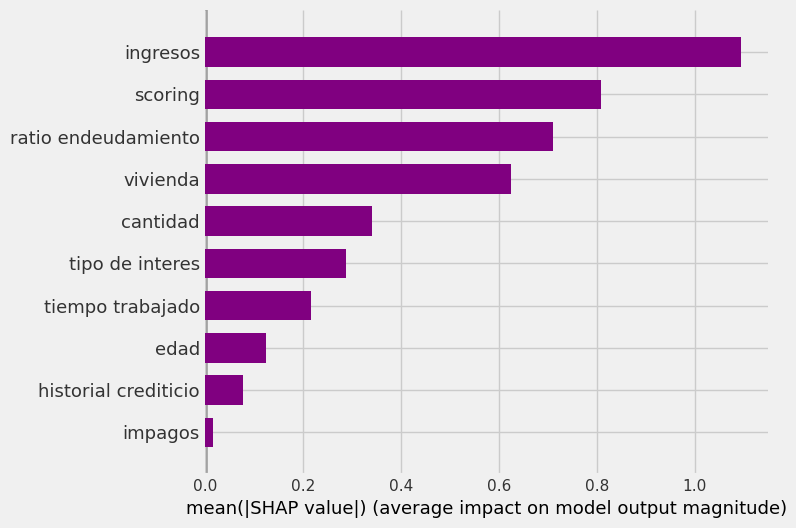

In [49]:
shap.summary_plot(shap_values, X_test, plot_type="bar", color='purple')

###### Predicción cuando una observación es = 0 Impago(No)

In [50]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

Las caracteríticas en azul son aquellas que indican que la variable va a ser cero para el cliente 0, es decir, aquellas variables que nos indican que el cliente va a realizar el pago.

###### Predicción cuando una observación es = 1 Impago(Sí)

In [51]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

In [52]:
shap.force_plot(explainer.expected_value, shap_values[6513,:], X_test.iloc[6513,:])

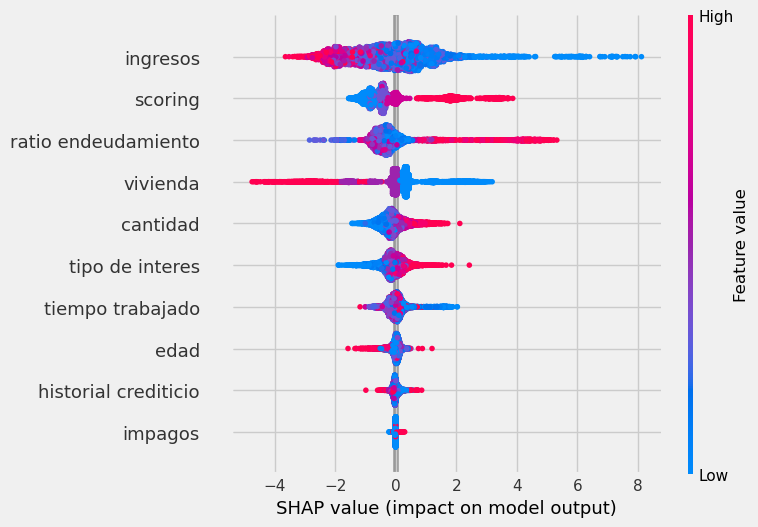

In [53]:
shap.summary_plot(shap_values, X_test)

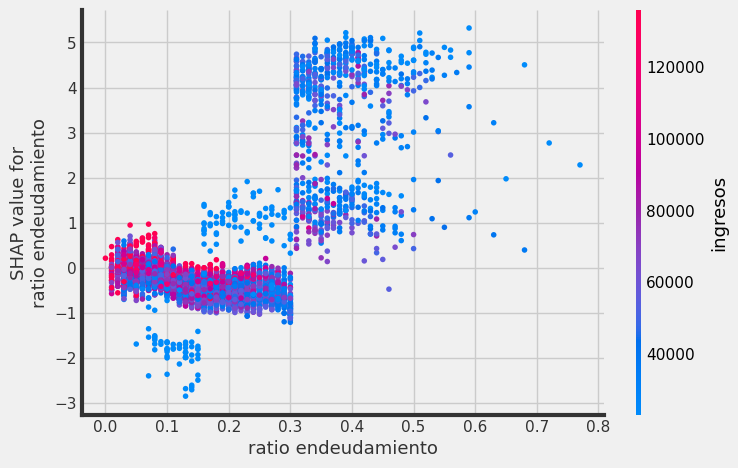

In [54]:
shap.dependence_plot(ind='ratio endeudamiento', interaction_index='ingresos',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

## Conclusión

En conclusión, en este trabajo hemos explorado el uso de algoritmos de machine learning para evaluar la solvencia de los clientes de un banco. Mediante la aplicación de modelos predictivos, hemos logrado obtener resultados prometedores en la predicción de la solvencia, lo cual tiene implicaciones importantes para la gestión de riesgos y la toma de decisiones crediticias.

Además, hemos utilizado modelos de interpretabilidad para comprender y explicar cómo funcionan estos algoritmos, brindando transparencia y confianza en los resultados obtenidos. Esto es crucial en el contexto bancario, donde se requiere una justificación clara de las decisiones que se toman.